#### Life cycle of Machine learning Project
* Understanding the Problem Statement
* Data Collection
* Exploratory data analysis
* Data Pre-Processing
* Model Training
* Model evaluation

## Credit Card Default Prediction
### 1)Project Overview :
* Credit Card Default Prediction is a classification problem.
* Credit Card payment default occurs when you fail to pay the Minimum Amount Due (MAD) on the credit card for a few consecutive months.
* The goal of this project is to predict the probability of credit card default based on credit card owner's characteristics and payment history.
* The dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.The project understands weather the other independent variables impacts default rate.


#### 2.1 Data Descriptiion

There are 25 variables:

* ID: ID of each client
* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)
* SEX: Gender (1=male, 2=female)
* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* MARRIAGE: Marital status (1=married, 2=single, 3=others)
* AGE: Age in years
* PAY_0: Repayment status in September, 2005 (-1= pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
* PAY_2: Repayment status in August, 2005 (scale same as above)
* PAY_3: Repayment status in July, 2005 (scale same as above)
* PAY_4: Repayment status in June, 2005 (scale same as above)
* PAY_5: Repayment status in May, 2005 (scale same as above)
* PAY_6: Repayment status in April, 2005 (scale same as above)
* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
default.payment.next.month: Default payment (1=yes, 0=no)



In [423]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
## Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

* Import the CSV Data as Pandas DataFrame

In [498]:
df = pd.read_csv("data/UCI_Credit_Card.csv")

In [499]:
#Checking records
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [500]:
df.shape

(30000, 25)

* Dataset has 30000 records and 25 columns

In [501]:

#WE will Rename he columns to lowercase and PAY_0 to PAY1,	default.payment.next.month to Default
df.rename(columns={"ID":"id", "LIMIT_BAL": "Limit_Bal", "SEX" : "Sex","EDUCATION":"Education","MARRIAGE" : "Marriage","AGE":"Age",
                       "PAY_0" : "Pay_1","PAY_2":"Pay_2","PAY_3":"Pay_3","PAY_4":"Pay_4","PAY_5":"Pay_5","PAY_6":"Pay_6",
                       "BILL_AMT1":"Bill_Amt1","BILL_AMT2":"Bill_Amt2","BILL_AMT3":"Bill_Amt3","BILL_AMT4":"Bill_Amt4",
                       "BILL_AMT5":"Bill_Amt5","BILL_AMT6":"Bill_Amt6","PAY_AMT1":"Pay_Amt1","PAY_AMT2":"Pay_Amt2",
                       "PAY_AMT3":"Pay_Amt3","PAY_AMT4":"Pay_Amt4","PAY_AMT5":"Pay_Amt5","PAY_AMT6":"Pay_Amt6",
                       "default.payment.next.month":"Default"}, inplace = True)

In [502]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         30000 non-null  int64  
 1   Limit_Bal  30000 non-null  float64
 2   Sex        30000 non-null  int64  
 3   Education  30000 non-null  int64  
 4   Marriage   30000 non-null  int64  
 5   Age        30000 non-null  int64  
 6   Pay_1      30000 non-null  int64  
 7   Pay_2      30000 non-null  int64  
 8   Pay_3      30000 non-null  int64  
 9   Pay_4      30000 non-null  int64  
 10  Pay_5      30000 non-null  int64  
 11  Pay_6      30000 non-null  int64  
 12  Bill_Amt1  30000 non-null  float64
 13  Bill_Amt2  30000 non-null  float64
 14  Bill_Amt3  30000 non-null  float64
 15  Bill_Amt4  30000 non-null  float64
 16  Bill_Amt5  30000 non-null  float64
 17  Bill_Amt6  30000 non-null  float64
 18  Pay_Amt1   30000 non-null  float64
 19  Pay_Amt2   30000 non-null  float64
 20  Pay_Am

In [503]:
df.head()

,id,Limit_Bal,Sex,Education,Marriage,Age,Pay_1,Pay_2,Pay_3,Pay_4,Pay_5,Pay_6,Bill_Amt1,Bill_Amt2,Bill_Amt3,Bill_Amt4,Bill_Amt5,Bill_Amt6,Pay_Amt1,Pay_Amt2,Pay_Amt3,Pay_Amt4,Pay_Amt5,Pay_Amt6,Default
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


Checking Missing Values

In [504]:
df.isnull().sum()

id           0
Limit_Bal    0
Sex          0
Education    0
Marriage     0
Age          0
Pay_1        0
Pay_2        0
Pay_3        0
Pay_4        0
Pay_5        0
Pay_6        0
Bill_Amt1    0
Bill_Amt2    0
Bill_Amt3    0
Bill_Amt4    0
Bill_Amt5    0
Bill_Amt6    0
Pay_Amt1     0
Pay_Amt2     0
Pay_Amt3     0
Pay_Amt4     0
Pay_Amt5     0
Pay_Amt6     0
Default      0
dtype: int64

* No Missing values found in the dataset

Checking Duplicate values

In [505]:
df.duplicated().sum()

0

* No duplicate records found in the dataset

In [506]:
#Lets drop the id column as it will not help us to predit default
df.drop(labels=["id"],axis=1,inplace=True)

In [507]:
df.head()

,Limit_Bal,Sex,Education,Marriage,Age,Pay_1,Pay_2,Pay_3,Pay_4,Pay_5,Pay_6,Bill_Amt1,Bill_Amt2,Bill_Amt3,Bill_Amt4,Bill_Amt5,Bill_Amt6,Pay_Amt1,Pay_Amt2,Pay_Amt3,Pay_Amt4,Pay_Amt5,Pay_Amt6,Default
0,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [508]:
df.nunique()

Limit_Bal       81
Sex              2
Education        7
Marriage         4
Age             56
Pay_1           11
Pay_2           11
Pay_3           11
Pay_4           11
Pay_5           10
Pay_6           10
Bill_Amt1    22723
Bill_Amt2    22346
Bill_Amt3    22026
Bill_Amt4    21548
Bill_Amt5    21010
Bill_Amt6    20604
Pay_Amt1      7943
Pay_Amt2      7899
Pay_Amt3      7518
Pay_Amt4      6937
Pay_Amt5      6897
Pay_Amt6      6939
Default          2
dtype: int64

### Statistical Analysis

In [509]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Limit_Bal,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
Sex,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
Education,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
Marriage,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
Age,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
Pay_1,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
Pay_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
Pay_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
Pay_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
Pay_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


Insights:
* The average credit balance given to the customers was 167484.
* Minimum Credit Balance given to credit card holder was 10000 and Maximum credit given was 1000000.
* Average age of the credit card holder was 35 years, with a standard deviation of 9.2.
* It can be seen from the statistics that minimum age of the credit card holder was 21 and maximum was 79.
 

## Exploratory Data Analysis

In [510]:
df["Sex"].value_counts()

Sex
2    18112
1    11888
Name: count, dtype: int64

* Count of Female seems to be more than Male

In [511]:
df["Sex"].value_counts(normalize=True)*100

Sex
2    60.373333
1    39.626667
Name: proportion, dtype: float64

* Female proportion in the dataset is likely to be 69% and 40% is for Males.

In [512]:
#Does Sex has impact on Default?
df.groupby('Sex')["Default"].value_counts()

Sex  Default
1    0           9015
     1           2873
2    0          14349
     1           3763
Name: count, dtype: int64

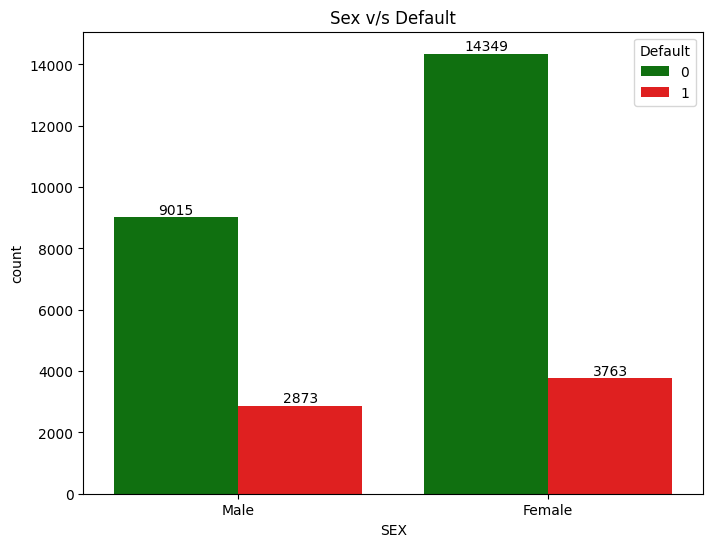

In [513]:
plt.figure(figsize=(8,6))
ax = sns.countplot(data=df,x="Sex",hue="Default",palette=["green","red"])
plt.xlabel("SEX")
plt.title("Sex v/s Default")
plt.xticks([0,1],["Male","Female"])
for i in ax.containers:
    ax.bar_label(i)

* It can be seen from the data that tendency of women to default is slightly more in comparison to male.

##### Education

In [514]:
df['Education'].value_counts()

Education
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

In [515]:
df['Education'].value_counts(normalize=True)*100

Education
2    46.766667
1    35.283333
3    16.390000
5     0.933333
4     0.410000
6     0.170000
0     0.046667
Name: proportion, dtype: float64

In [516]:
df.groupby("Education")["Default"].value_counts()

Education  Default
0          0             14
1          0           8549
           1           2036
2          0          10700
           1           3330
3          0           3680
           1           1237
4          0            116
           1              7
5          0            262
           1             18
6          0             43
           1              8
Name: count, dtype: int64

In [517]:
# As  5,6,0  unknown I am consedaring under others
df['Education']=df['Education'].apply(lambda x : 4 if x >4 or x < 1 else x)

In [518]:
df['Education'].value_counts()

Education
2    14030
1    10585
3     4917
4      468
Name: count, dtype: int64

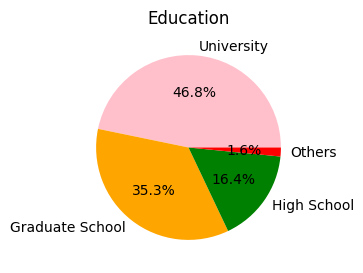

In [519]:
plt.figure(figsize=(3,3))
size = df['Education'].value_counts()
labels = 'University','Graduate School','High School','Others'
color = ['pink','orange',"green","red"]
plt.pie(size, colors = color, labels = labels,autopct='%1.1f%%')
plt.title('Education', fontsize =12)
plt.show()

* As per data, 47% of card holders had there Education from University, followed by Graduate School.

Does Education impacts the Default

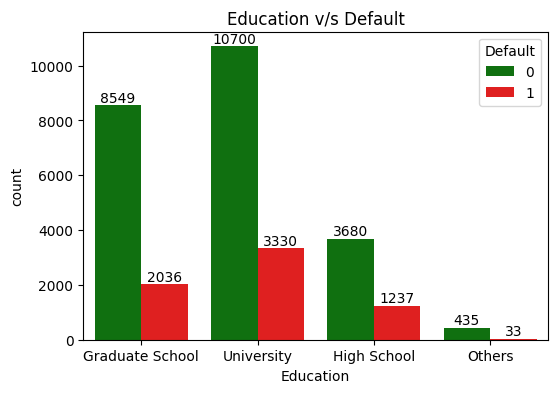

In [520]:
plt.figure(figsize=(6,4))
ax = sns.countplot(data=df,x="Education",hue="Default",palette=["green","red"])
plt.xlabel("Education")
plt.title("Education v/s Default")
plt.xticks([0,1,2,3],["Graduate School","University","High School","Others"])
for i in ax.containers:
    ax.bar_label(i)

* The predominant level of education in our dataset seems to be University followed by Graduate School,High School and Others.

Does Education has any relation with Sex

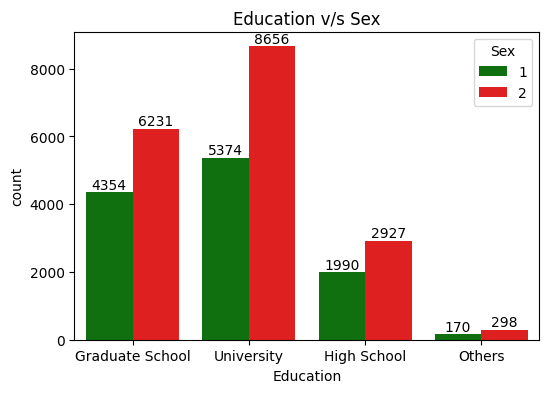

In [521]:
plt.figure(figsize=(6,4))
ax = sns.countplot(data=df,x="Education",hue="Sex",palette=["green","red"])
plt.xlabel("Education")
plt.title("Education v/s Sex")
plt.xticks([0,1,2,3],["Graduate School","University","High School","Others"])
for i in ax.containers:
    ax.bar_label(i)

* Female seems to be more Educated than Males.

#### Marriage

In [522]:
df["Marriage"].value_counts()

Marriage
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

In [523]:
df["Marriage"].value_counts(normalize=True)*100

Marriage
2    53.213333
1    45.530000
3     1.076667
0     0.180000
Name: proportion, dtype: float64

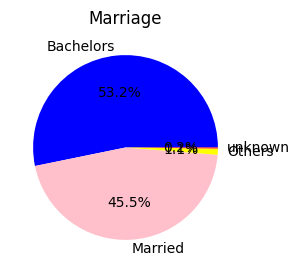

In [524]:
plt.figure(figsize=(3,3))
size = df['Marriage'].value_counts()
labels = 'Bachelors','Married',"Others","unknown"
color = ['Blue','pink',"yellow","red"]
plt.pie(size, colors = color, labels = labels,autopct='%1.1f%%')
plt.title('Marriage', fontsize =12)
plt.show()

* 53.2% of card holders seems to be Bachelors and 45.5% are Married .

In [525]:
#does Marriage has impact on Default Rate?
df.groupby("Marriage")["Default"].value_counts()

Marriage  Default
0         0             49
          1              5
1         0          10453
          1           3206
2         0          12623
          1           3341
3         0            239
          1             84
Name: count, dtype: int64

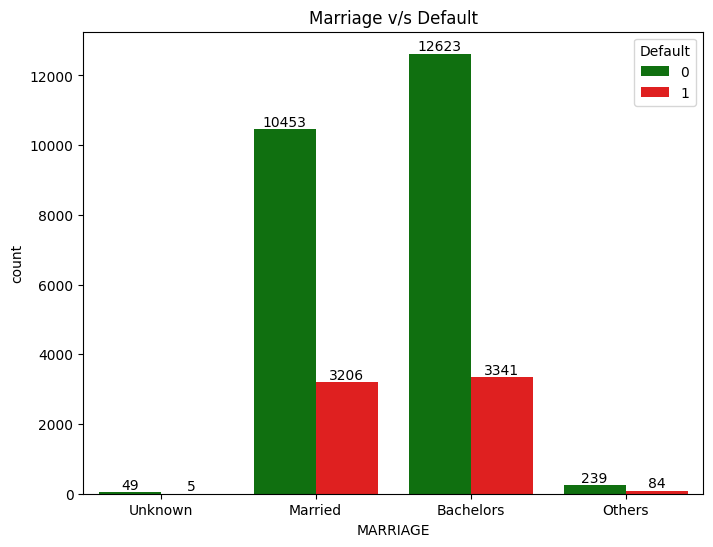

In [526]:
plt.figure(figsize=(8,6))
ax = sns.countplot(data=df,x="Marriage",hue="Default",palette=["green","red"])
plt.xlabel("MARRIAGE")
plt.title("Marriage v/s Default")
plt.xticks([0,1,2,3],["Unknown","Married","Bachelors","Others"])
for i in ax.containers:
    ax.bar_label(i)

It can be seen Bachelors and Married people are more likely to default 

In [527]:
#Relation between Sex + Marriage w.r.t Default
df.groupby(["Sex","Marriage"])["Default"].value_counts()

Sex  Marriage  Default
1    0         0            12
               1             2
     1         0          3844
               1          1346
     2         0          5068
               1          1485
     3         0            91
               1            40
2    0         0            37
               1             3
     1         0          6609
               1          1860
     2         0          7555
               1          1856
     3         0           148
               1            44
Name: count, dtype: int64

* Irrespective of the Gender, it seems like card holders those who are Married or are Bachelor/Single have higher chance to default.

In [528]:
df.groupby(["Sex","Marriage"])["Default"].value_counts(normalize=True)*100

Sex  Marriage  Default
1    0         0          85.714286
               1          14.285714
     1         0          74.065511
               1          25.934489
     2         0          77.338624
               1          22.661376
     3         0          69.465649
               1          30.534351
2    0         0          92.500000
               1           7.500000
     1         0          78.037549
               1          21.962451
     2         0          80.278398
               1          19.721602
     3         0          77.083333
               1          22.916667
Name: proportion, dtype: float64

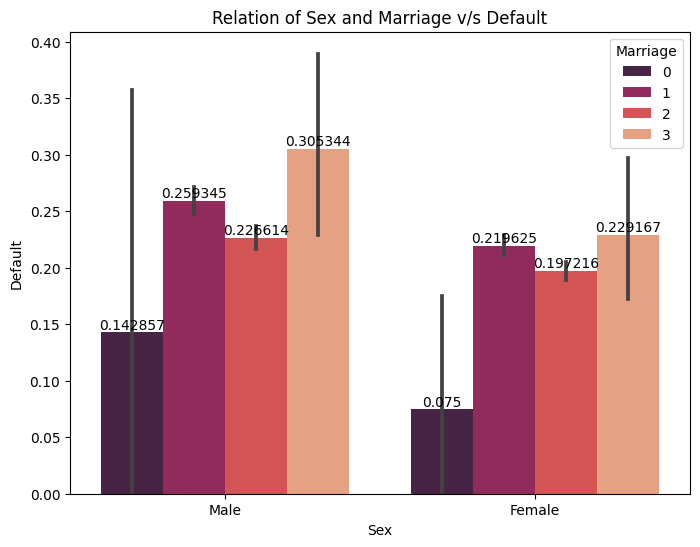

In [529]:
#Plot relation  between Sex + Marriage w.r.t Default
plt.figure(figsize=(8,6))
ax = sns.barplot(data=df,x="Sex",y="Default",hue="Marriage",palette="rocket")
plt.xlabel("Sex")
plt.title("Relation of Sex and Marriage v/s Default")
plt.xticks([0,1],["Male","Female"])
for i in ax.containers:
    ax.bar_label(i)

* We can say Others category which could be divorced people also have higher impact on default rate.

In [530]:
#Does Education + Sex has any impact on default?
df.groupby(by=['Education', 'Sex'])['Default'].value_counts(normalize = True)

Education  Sex  Default
1          1    0          0.791915
                1          0.208085
           2    0          0.818649
                1          0.181351
2          1    0          0.737998
                1          0.262002
           2    0          0.777957
                1          0.222043
3          1    0          0.726131
                1          0.273869
           2    0          0.763580
                1          0.236420
4          1    0          0.917647
                1          0.082353
           2    0          0.936242
                1          0.063758
Name: proportion, dtype: float64

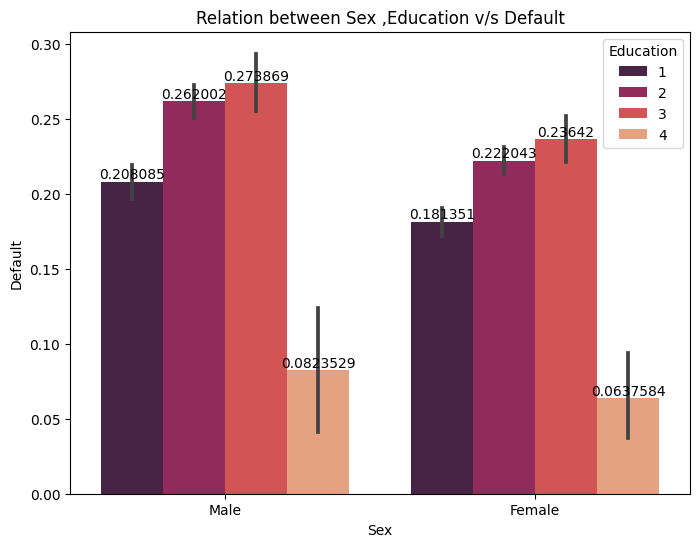

In [531]:
#Plot relation  between Education + Sex w.r.t Default
plt.figure(figsize=(8,6))
ax = sns.barplot(data=df,x="Sex",y="Default",hue="Education",palette="rocket")
plt.xlabel("Sex")
plt.title("Relation between Sex ,Education v/s Default")
plt.xticks([0,1],["Male","Female"])
for i in ax.containers:
    ax.bar_label(i)

* In every single comparison, the probability of default was higher for men.

### Numerical Variables :

##### Target Variable (Default):

In [532]:
df["Default"].value_counts()

Default
0    23364
1     6636
Name: count, dtype: int64

In [533]:
df["Default"].value_counts(normalize=True)*100

Default
0    77.88
1    22.12
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Default v/s Not Default')

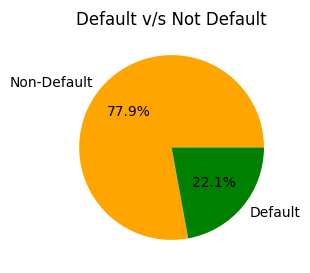

In [534]:
plt.figure(figsize=(3,3))
plt.pie(df["Default"].value_counts(),colors=["Orange","green"],labels=["Non-Default","Default"],autopct='%1.1f%%')
plt.title("Default v/s Not Default")

* We can see it is an imbalance data set with 22% Defaulters and 78% Non-Defaulters
* To handle imbalanced data we have to use Under or Over Sampling

#### AGE

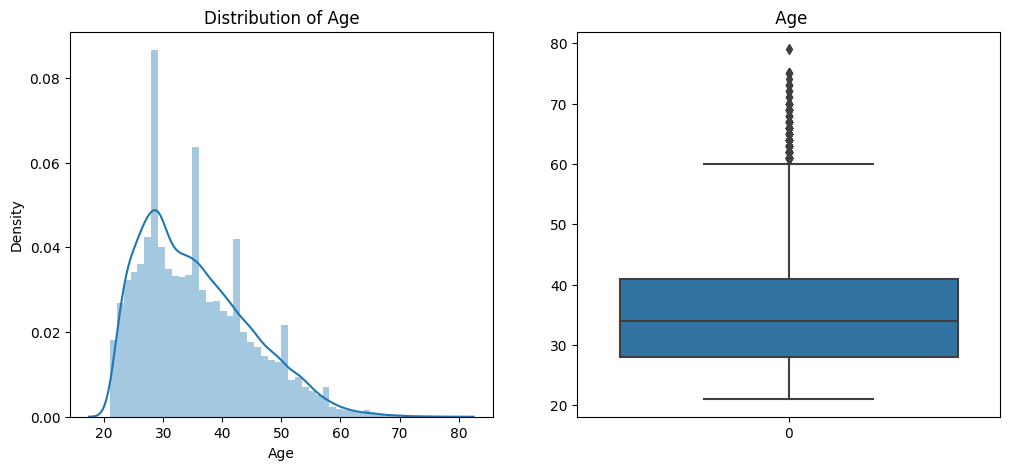

In [535]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,2)
plt.subplot(121)
sns.distplot(df["Age"])
plt.title("Distribution of Age")
plt.subplot(122)
sns.boxplot(df["Age"])
plt.title(" Age")

plt.show()

* Distribution of Age seems to be right skewed.
* Most of our data distribution lies between the age of 20 to 40.
* from Boxplot we can see the outliers in the data.

In [536]:
#Lets cut the Distribution into bins to get better understanding which age group have higher chances to default
df['AgeBin'] = pd.cut(df['Age'],[20, 25, 30, 35, 40, 50, 60, 80])
print(df['AgeBin'].value_counts())

AgeBin
(25, 30]    7142
(40, 50]    6005
(30, 35]    5796
(35, 40]    4917
(20, 25]    3871
(50, 60]    1997
(60, 80]     272
Name: count, dtype: int64


In [537]:
df['Default'].groupby(df['AgeBin']).value_counts(normalize = True)*100

AgeBin    Default
(20, 25]  0          73.340222
          1          26.659778
(25, 30]  0          79.851582
          1          20.148418
(30, 35]  0          80.572809
          1          19.427191
(35, 40]  0          78.381127
          1          21.618873
(40, 50]  0          76.702748
          1          23.297252
(50, 60]  0          74.762143
          1          25.237857
(60, 80]  0          73.161765
          1          26.838235
Name: proportion, dtype: float64

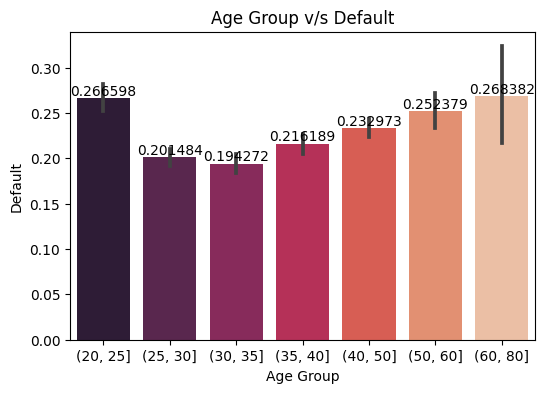

In [538]:
plt.figure(figsize=(6,4))
df['AgeBin'] = df['AgeBin'].astype('str')
AgeBin_order = ['(20, 25]', '(25, 30]', '(30, 35]', '(35, 40]', '(40, 50]', '(50, 60]', '(60, 80]']

ax = sns.barplot(data=df,x="AgeBin",y="Default",palette="rocket",order=AgeBin_order)
plt.xlabel("Age Group")
plt.title("Age Group v/s Default")
#plt.xticks([0,1],["Male","Female"])
for i in ax.containers:
    ax.bar_label(i)


* Higher chances of defaulters seems to be between age group (20 to 25) and 60+. 

#### Amount of Credit Given (LIMIT_BAl)

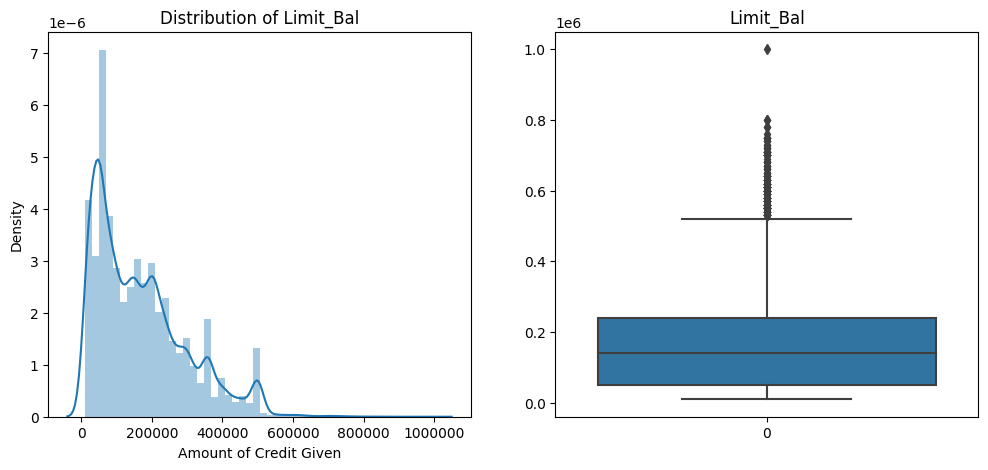

In [539]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,2)
plt.subplot(121)
sns.distplot(df["Limit_Bal"])
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel("Amount of Credit Given")
plt.title("Distribution of Limit_Bal")
plt.subplot(122)
sns.boxplot(df["Limit_Bal"])
plt.title("Limit_Bal")
plt.show()

* Distribution of the Limit_Bal seems to be right skewed.
* Most of the credit card holders have credit balance less than 200000.
* Outliers can also be seen in the data.

In [540]:
# Lets cut the Distribution  of Limit_Bal into bins to get better understanding .
df['LimitBin'] = pd.cut(df["Limit_Bal"],[5000, 50000, 100000, 150000, 200000, 300000, 400000, 500000, 1100000])
print(df['LimitBin'].value_counts())

LimitBin
(5000, 50000]        7676
(200000, 300000]     5059
(50000, 100000]      4822
(150000, 200000]     3978
(100000, 150000]     3902
(300000, 400000]     2759
(400000, 500000]     1598
(500000, 1100000]     206
Name: count, dtype: int64


In [541]:
df['Default'].groupby(df['LimitBin']).value_counts(normalize = True)*100

LimitBin           Default
(5000, 50000]      0          68.212611
                   1          31.787389
(50000, 100000]    0          74.201576
                   1          25.798424
(100000, 150000]   0          78.856996
                   1          21.143004
(150000, 200000]   0          82.151835
                   1          17.848165
(200000, 300000]   0          83.949397
                   1          16.050603
(300000, 400000]   0          85.936934
                   1          14.063066
(400000, 500000]   0          87.859825
                   1          12.140175
(500000, 1100000]  0          88.834951
                   1          11.165049
Name: proportion, dtype: float64

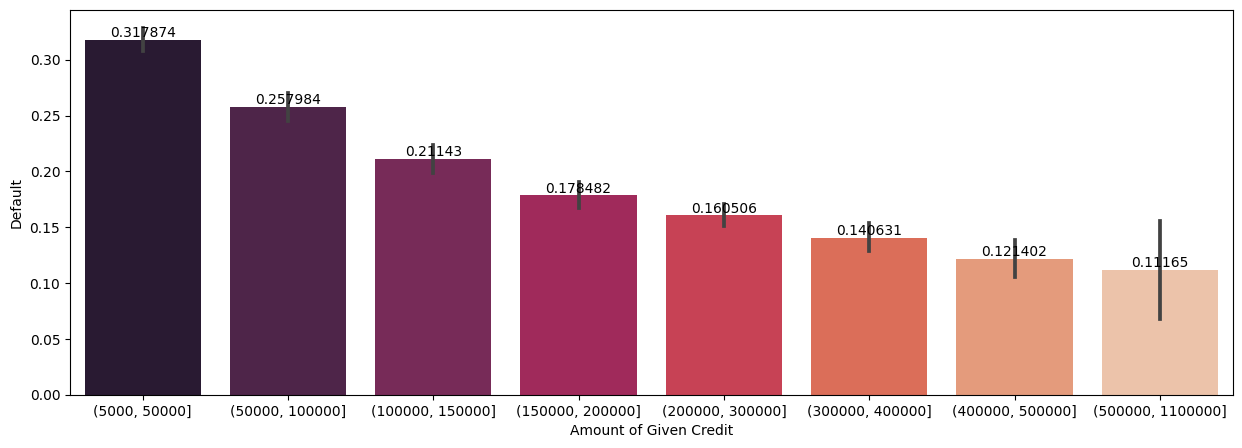

In [542]:
#Plot graph of Limit_Bin with Default
plt.figure(figsize=(15,5))

df['LimitBin'] = df['LimitBin'].astype('str')
Limit_Bin_Order = ['(5000, 50000]', '(50000, 100000]', '(100000, 150000]', '(150000, 200000]',
                '(200000, 300000]', '(300000, 400000]', '(400000, 500000]', '(500000, 1100000]']
ax = sns.barplot(data =df, x="LimitBin" ,y="Default",palette='rocket',order=Limit_Bin_Order)
plt.xlabel("Amount of Given Credit")
plt.ylabel("Default")
for i in ax.containers:
    ax.bar_label(i)

* It is clear from the graph that there are significant defaulters whose credit limit was from 5000 to 50000.
* We can also see that the higher the limit, the lower is the chance of defaulting.


#### Amount of Given Credit (LIMIT_BAL) + Demographic Features

In [543]:
#Relationship of Sex Column with The Limit_BAl
#Does their was any relationship of credit given w.r.t Sex
df.groupby('Sex')["Limit_Bal"].mean()

Sex
1    163519.825034
2    170086.462014
Name: Limit_Bal, dtype: float64

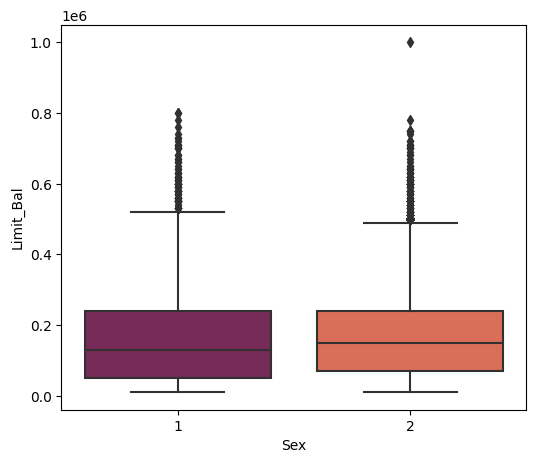

In [544]:
plt.figure(figsize=(6,5))

sns.boxplot(x='Sex',y='Limit_Bal',data=df,palette='rocket')
plt.show()

* It can be seen average credit given to womens was slightly more than Males.

In [545]:
#Relationship of Education Column with The Limit_BAl
#Does their was any relationship of credit given w.r.t Education
df.groupby('Education')["Limit_Bal"].mean()

Education
1    212956.069910
2    147062.437634
3    126550.270490
4    181316.239316
Name: Limit_Bal, dtype: float64

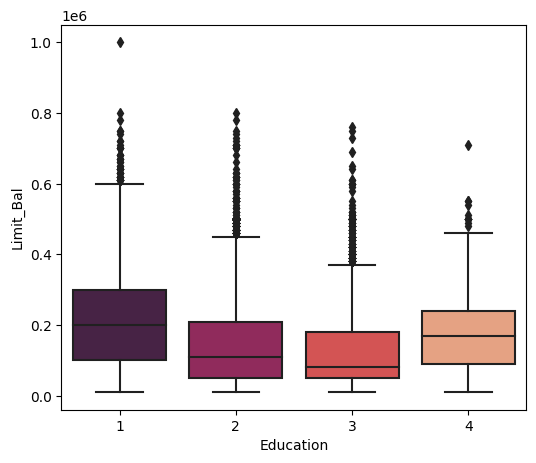

In [546]:
plt.figure(figsize=(6,5))

sns.boxplot(x='Education',y='Limit_Bal',data=df,palette='rocket')
plt.show()

* It can be seen that the card holders who had Education in Graduate School and from other institutions were given higher credit Balance.

In [547]:
#Relationship of MArriage Column with The Limit_BAl
#Does their was any relationship of credit given w.r.t Marriage
df.groupby('Marriage')["Limit_Bal"].mean()

Marriage
0    132962.962963
1    182200.893184
2    156413.660737
3     98080.495356
Name: Limit_Bal, dtype: float64

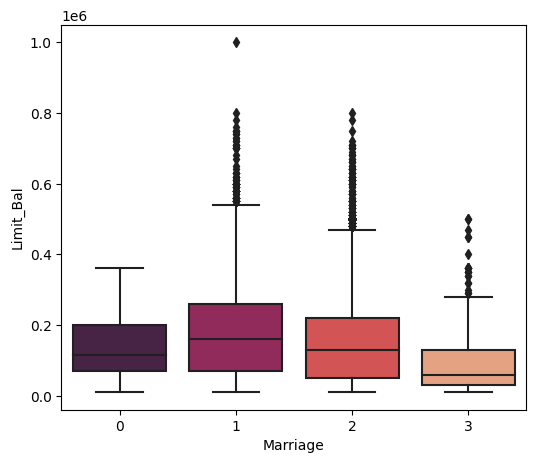

In [548]:
plt.figure(figsize=(6,5))

sns.boxplot(x='Marriage',y='Limit_Bal',data=df,palette='rocket')
plt.show()

* Average credit given to Married card holders seems to be higher in comparison to others.

In [549]:
#Relationship of Age Group with The Limit_BAl
#Does their was any relationship of credit given w.r.t specific age Group
df.groupby('AgeBin')["Limit_Bal"].mean()

AgeBin
(20, 25]     73763.885301
(25, 30]    164320.918510
(30, 35]    197688.060732
(35, 40]    196780.557250
(40, 50]    179680.213156
(50, 60]    159349.023535
(60, 80]    201617.647059
Name: Limit_Bal, dtype: float64

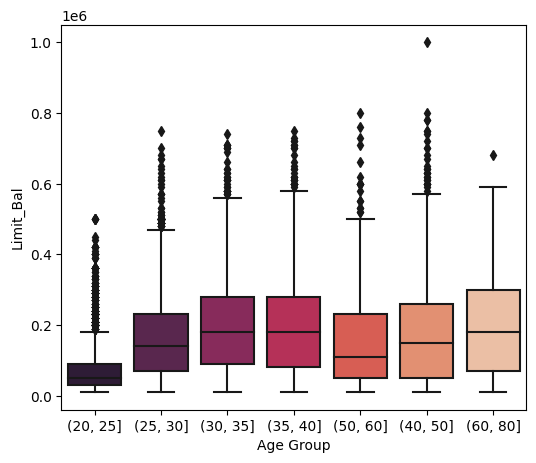

In [550]:
plt.figure(figsize=(6,5))

sns.boxplot(x='AgeBin',y='Limit_Bal',data=df,palette='rocket')
plt.xlabel("Age Group")
plt.show()

* It can be seen the average credit limit offered to senior citizens (60+) is more, despite higher chances of default.

In [551]:
df.drop(labels=["AgeBin"],axis=1)

,Limit_Bal,Sex,Education,Marriage,Age,Pay_1,Pay_2,Pay_3,Pay_4,Pay_5,Pay_6,Bill_Amt1,Bill_Amt2,Bill_Amt3,Bill_Amt4,Bill_Amt5,Bill_Amt6,Pay_Amt1,Pay_Amt2,Pay_Amt3,Pay_Amt4,Pay_Amt5,Pay_Amt6,Default,LimitBin
0,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,"(5000, 50000]"
1,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,"(100000, 150000]"
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,"(50000, 100000]"
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,"(5000, 50000]"
4,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,"(5000, 50000]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0,"(200000, 300000]"
29996,150000.0,1,3,2,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0,"(100000, 150000]"
29997,30000.0,1,2,2,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1,"(5000, 50000]"
29998,80000.0,1,3,1,41,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1,"(50000, 100000]"


#### Repayment Status

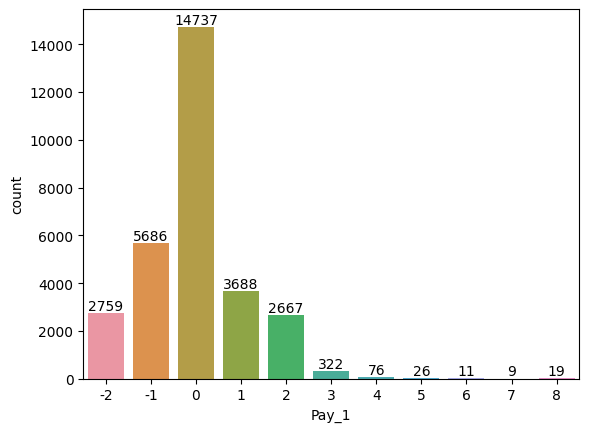

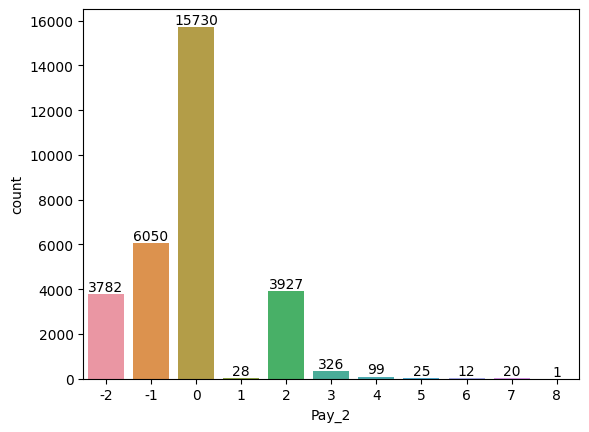

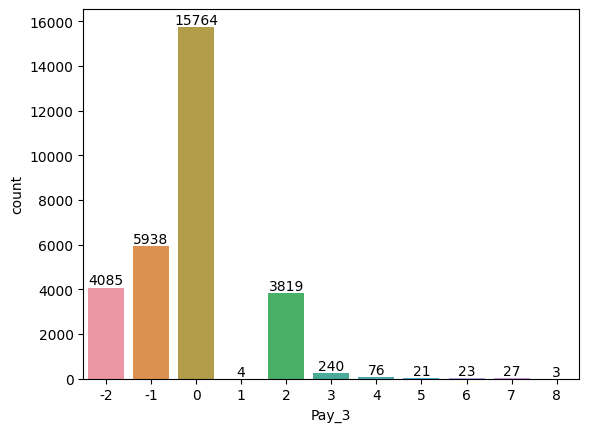

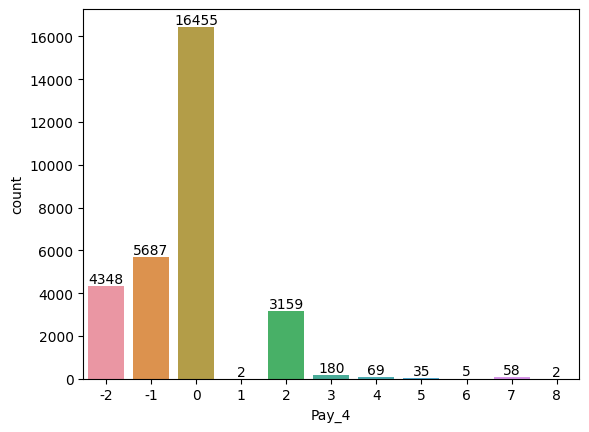

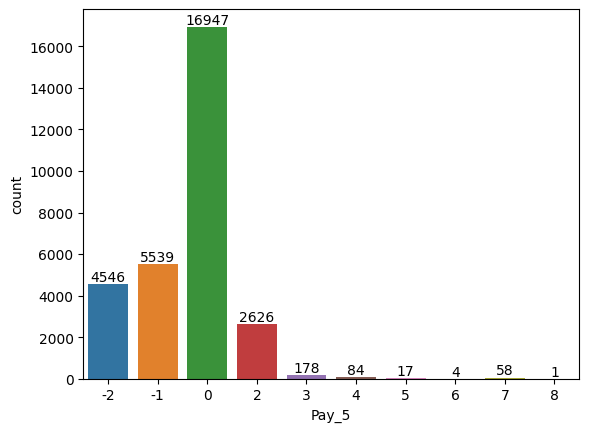

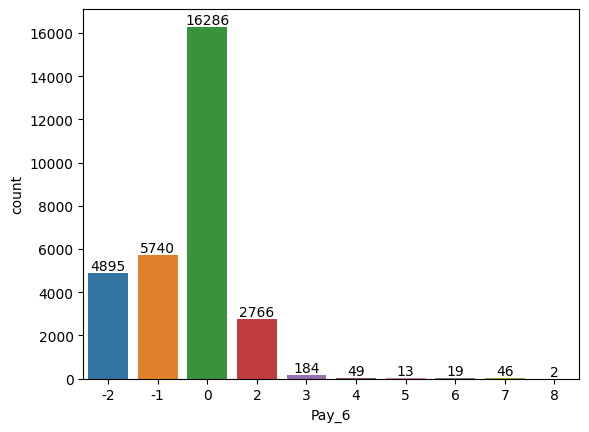

In [552]:
pay_x =['Pay_1',"Pay_2","Pay_3","Pay_4","Pay_5","Pay_6"]

x=1
for i in pay_x:
     ax = sns.countplot(x=i,data=df)
     for j in ax.containers:
          ax.bar_label(j) 
     plt.show()
     

* Clients who have delay payment in the latest month tends to have default payment next month.As per data, Most of the people have duly paid their credit card bills.The negative value defines that the bank owes that value to customers.
* It can be seen that some of the clients stopped paying bills after 3rd month.

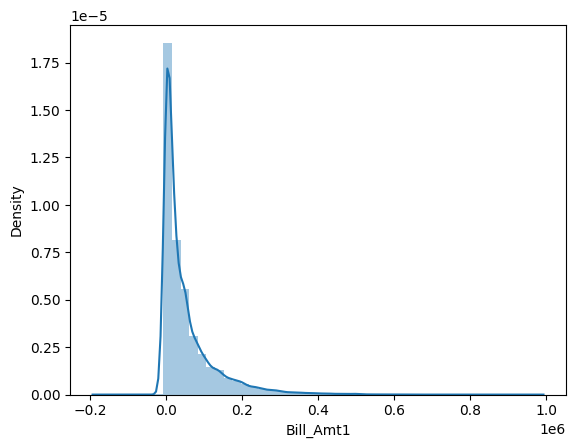

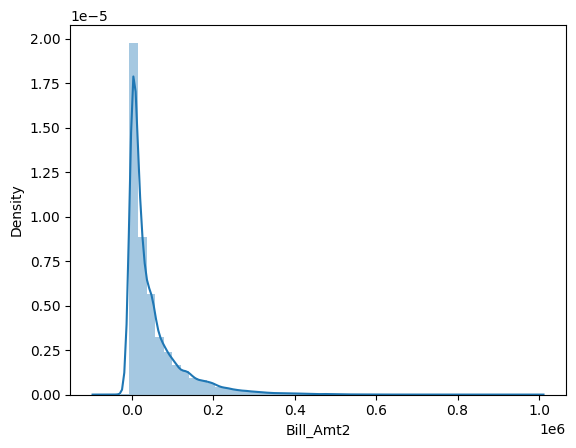

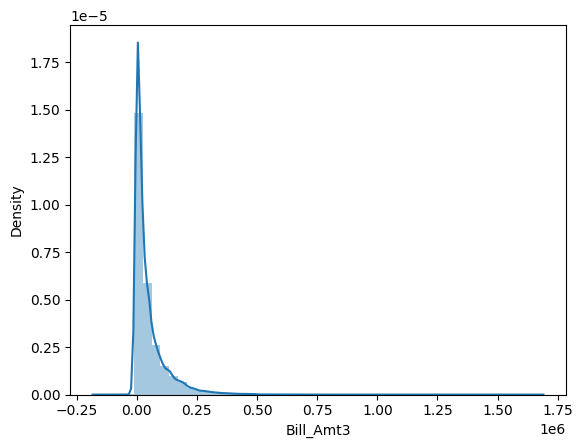

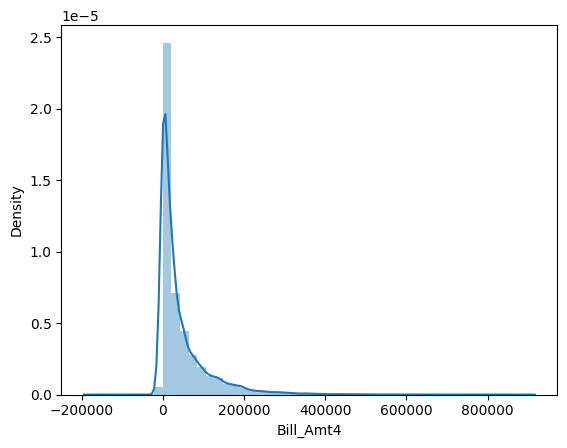

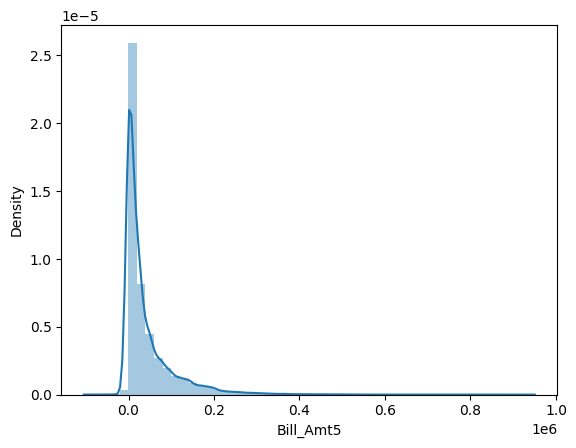

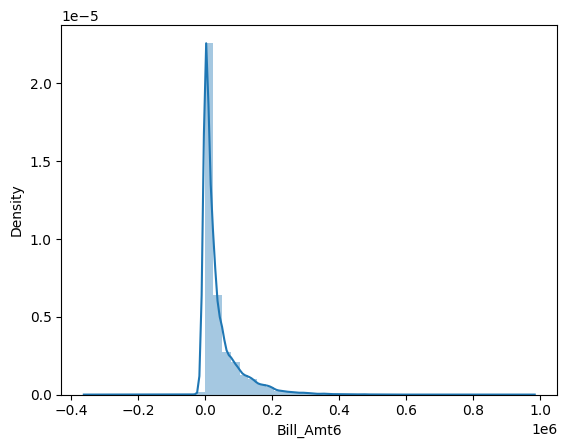

In [553]:
bill_amtx_fts = ["Bill_Amt1","Bill_Amt2","Bill_Amt3","Bill_Amt4","Bill_Amt5","Bill_Amt6"]

x=1
for i in bill_amtx_fts:
     ax = sns.distplot(df[i],kde=True)
     plt.show()

* It can be seen Distribution of all bill amounts seems to be  right skewed.

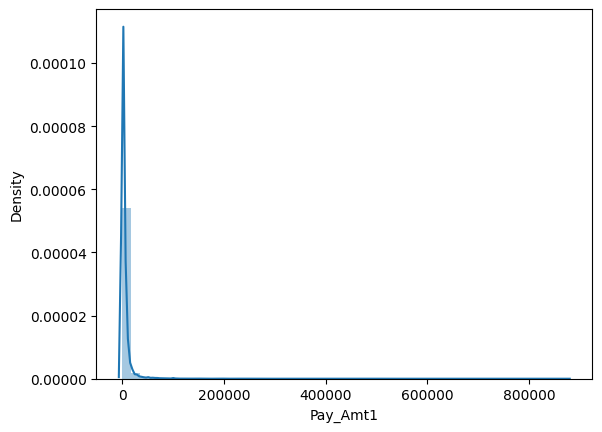

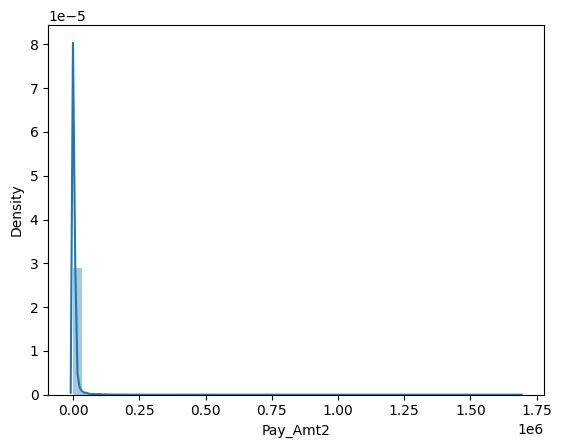

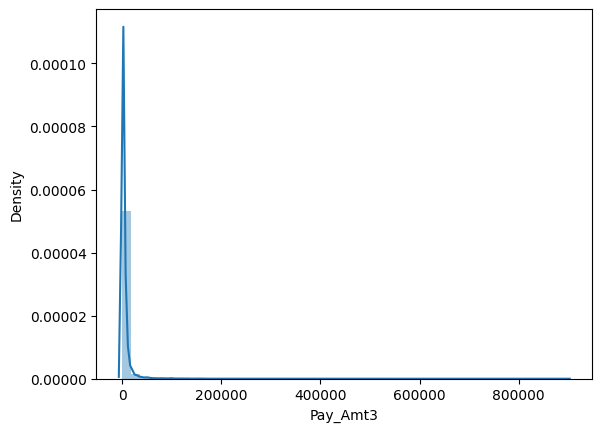

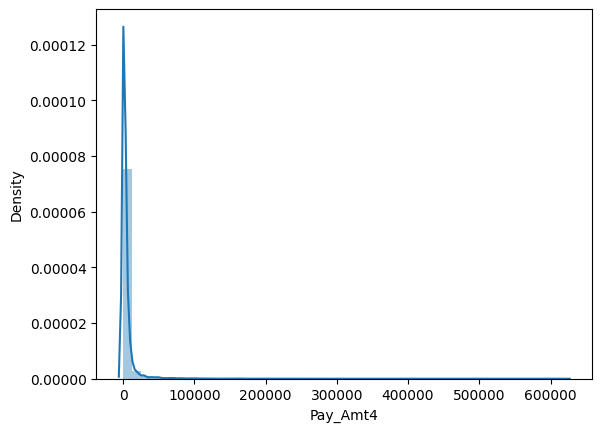

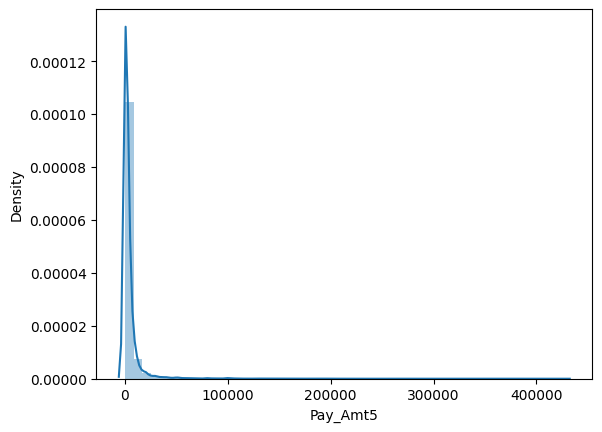

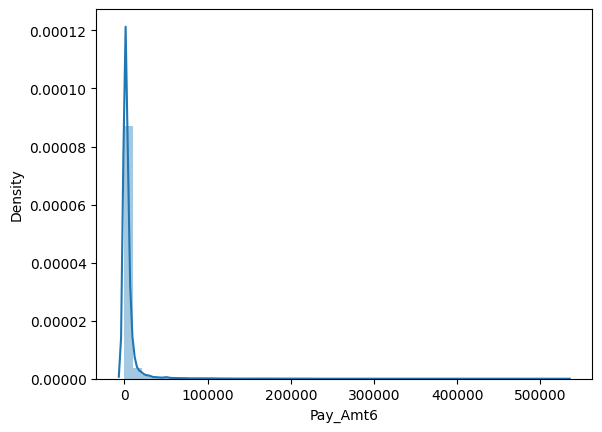

In [554]:
pay_amtx_fts = ["Pay_Amt1","Pay_Amt2","Pay_Amt3","Pay_Amt4","Pay_Amt5","Pay_Amt6"]

x=1
for i in pay_amtx_fts:
     ax = sns.distplot(df[i],kde=True)
     plt.show()

* It can be seen Distribution of all Pay amounts seems to be  right skewed.

In [557]:
df.drop(labels=["AgeBin","LimitBin"],axis=1,inplace=True)
df.head()

,Limit_Bal,Sex,Education,Marriage,Age,Pay_1,Pay_2,Pay_3,Pay_4,Pay_5,Pay_6,Bill_Amt1,Bill_Amt2,Bill_Amt3,Bill_Amt4,Bill_Amt5,Bill_Amt6,Pay_Amt1,Pay_Amt2,Pay_Amt3,Pay_Amt4,Pay_Amt5,Pay_Amt6,Default
0,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


<function matplotlib.pyplot.show(close=None, block=None)>

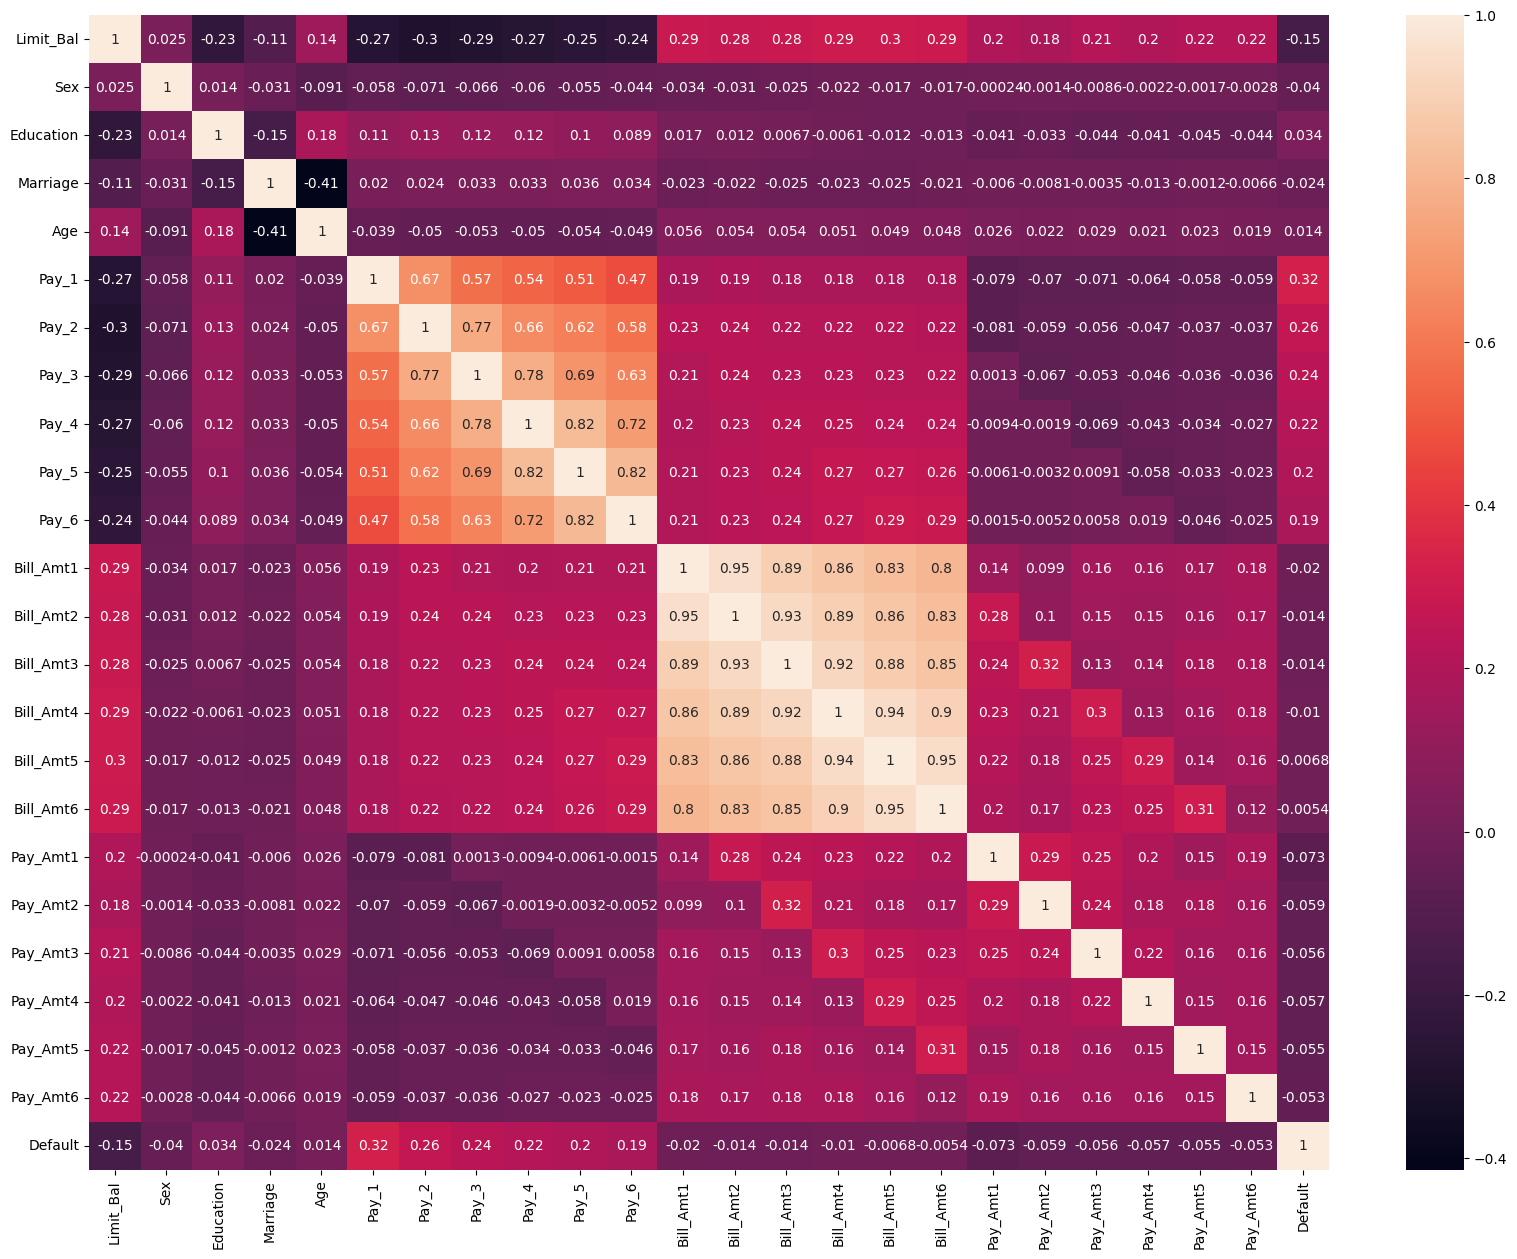

In [558]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)
plt.show

*Repayement Status and Bill_Amt of all the months seems to be positively correlated to each other.

### Handling Outliers

In [559]:
#### Handling Outliers in Age
q1,q3 = np.percentile(df["Age"],[25,75])
print("Q1 :",q1)
print("Q3 :",q3)

Q1 : 28.0
Q3 : 41.0


In [560]:
# Calculating IQR
IQR = q3-q1
print("IQR :",IQR)

IQR : 13.0


In [561]:
#Calculate the lower_fence and Upper_fence
lower_fence = q1-1.5*IQR
upper_fence = q3+1.5*IQR
print(" Lower Fence :",lower_fence)
print(" Upper Fence :",upper_fence)

 Lower Fence : 8.5
 Upper Fence : 60.5


In [562]:
df['Age'] = np.where(df['Age'] > upper_fence, upper_fence,
                 np.where(df['Age'] < lower_fence, lower_fence,df['Age']))

<function matplotlib.pyplot.show(close=None, block=None)>

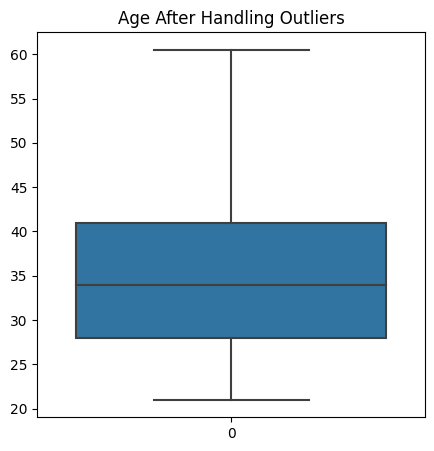

In [563]:
# Ploting box Plot After Outlier capping
plt.figure(figsize=(5,5))
sns.boxplot(df['Age'])
plt.title("Age After Handling Outliers")
plt.show

In [564]:
#Handling outliers in Limit_Bal
q1,q3 = np.percentile(df["Limit_Bal"],[25,75])
print("Q1 :",q1)
print("Q3 :",q3)

Q1 : 50000.0
Q3 : 240000.0


In [565]:
IQR =q3-q1
print("IQR :",IQR)

IQR : 190000.0


In [566]:
lower_fence = q1- 1.5*IQR
upper_fence = q3 +1.5*IQR
print(" Lower Fence :",lower_fence)
print(" Upper Fence :",upper_fence)

 Lower Fence : -235000.0
 Upper Fence : 525000.0


In [567]:
df['Limit_Bal'] = np.where(df['Limit_Bal'] > upper_fence, upper_fence,
                 np.where(df['Limit_Bal'] < lower_fence, lower_fence,df['Limit_Bal']))

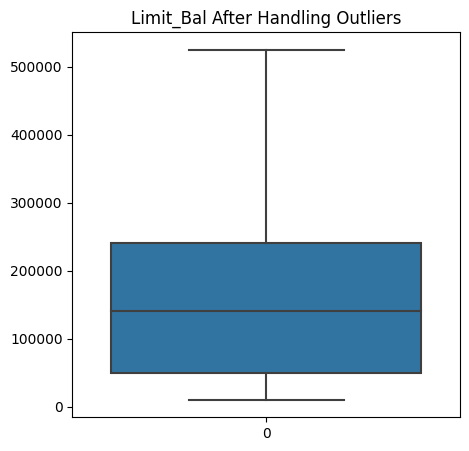

In [568]:
# Ploting box Plot After Outlier capping
plt.figure(figsize=(5,5))
sns.boxplot(df['Limit_Bal'])
plt.title("Limit_Bal After Handling Outliers")
plt.show()

#### Handling Imbalance Dataset

In [586]:
print(f'Non Defaulter count : {df["Default"].value_counts()[0]}')
print(f'Non Defaulter Percentage : {df["Default"].value_counts(normalize=True)[0]*100} %')
print(f'Defaulter count : {df["Default"].value_counts()[1]}')
print(f'Defaulter Percentage : {df["Default"].value_counts(normalize=True)[1]*100} %')

Non Defaulter count : 23364
Non Defaulter Percentage : 77.88000000000001 %
Defaulter count : 6636
Defaulter Percentage : 22.12 %


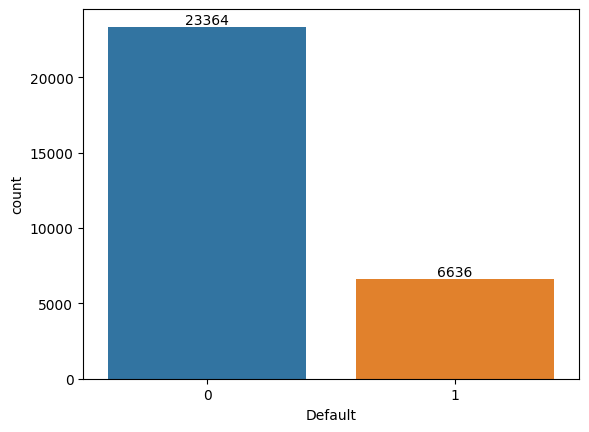

In [588]:
ax=sns.countplot(x=df['Default'])
for i in ax.containers:
    ax.bar_label(i)